# Import Libraries

In [70]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import balanced_accuracy_score

import optuna

import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


X = train.drop(['id', 'prognosis'], axis=1)
y = train['prognosis']

X_test = test.drop(['id'], axis=1)

# Missing Data

In [72]:
for col in train.columns:
    num_missing_values = train[col].isna().sum()
    print(f'col: {col} -- {num_missing_values}')

col: id -- 0
col: sudden_fever -- 0
col: headache -- 0
col: mouth_bleed -- 0
col: nose_bleed -- 0
col: muscle_pain -- 0
col: joint_pain -- 0
col: vomiting -- 0
col: rash -- 0
col: diarrhea -- 0
col: hypotension -- 0
col: pleural_effusion -- 0
col: ascites -- 0
col: gastro_bleeding -- 0
col: swelling -- 0
col: nausea -- 0
col: chills -- 0
col: myalgia -- 0
col: digestion_trouble -- 0
col: fatigue -- 0
col: skin_lesions -- 0
col: stomach_pain -- 0
col: orbital_pain -- 0
col: neck_pain -- 0
col: weakness -- 0
col: back_pain -- 0
col: weight_loss -- 0
col: gum_bleed -- 0
col: jaundice -- 0
col: coma -- 0
col: diziness -- 0
col: inflammation -- 0
col: red_eyes -- 0
col: loss_of_appetite -- 0
col: urination_loss -- 0
col: slow_heart_rate -- 0
col: abdominal_pain -- 0
col: light_sensitivity -- 0
col: yellow_skin -- 0
col: yellow_eyes -- 0
col: facial_distortion -- 0
col: microcephaly -- 0
col: rigor -- 0
col: bitter_tongue -- 0
col: convulsion -- 0
col: anemia -- 0
col: cocacola_urine -- 0
co

# Categorical Data

In [73]:
# for col in train.columns:
#     num_categorical_values = train[col].value_counts()
#     print(f'col: {col} -- {num_categorical_values}')
    
s = set()
for val in train['prognosis']:
    s.add(val)
    
for i in s:
    print(i)

Zika
Rift_Valley_fever
Yellow_Fever
West_Nile_fever
Chikungunya
Tungiasis
Malaria
Japanese_encephalitis
Lyme_disease
Plague
Dengue


# Ordinal Encoding

In [74]:
def ordinal_encode(data, inverse=False):
    ordinal_encoder = {
        'Malaria':0,
        'West_Nile_fever':1,
        'Lyme_disease':2,
        'Plague':3,
        'Tungiasis':4,
        'Japanese_encephalitis':5,
        'Chikungunya':6,
        'Zika':7,
        'Yellow_Fever':8,
        'Dengue':9,
        'Rift_Valley_fever':10
    }
    
    inverse_ordinal_encoder={}
    
    for k,v in ordinal_encoder.items():
        print(f'k{k}  v{v}')
        inverse_ordinal_encoder[v]=k
    
    if(inverse==False):
        

        for i in range(0, len(data)):
            data[i]=ordinal_encoder[data[i]];
        
    else:
        
        
        for i in range(0, len(data)):
            data[i]=inverse_ordinal_encoder[data[i]]
            
    return data
    
    # ordinal_encoder = OrdinalEncoder();
    # data = ordinal_encoder.fit_transform(data)
    # return data
    
enc = OrdinalEncoder()
enc.fit_transform(y)

ValueError: Expected 2D array, got 1D array instead:
array=['Lyme_disease' 'Tungiasis' 'Lyme_disease' 'Zika' 'Rift_Valley_fever'
 'Lyme_disease' 'West_Nile_fever' 'Tungiasis' 'Malaria' 'Chikungunya'
 'Plague' 'Zika' 'Dengue' 'Malaria' 'Chikungunya' 'Malaria' 'Zika'
 'Yellow_Fever' 'Tungiasis' 'Lyme_disease' 'Chikungunya' 'Chikungunya'
 'West_Nile_fever' 'Zika' 'Lyme_disease' 'Japanese_encephalitis'
 'Yellow_Fever' 'Plague' 'Rift_Valley_fever' 'Chikungunya'
 'Japanese_encephalitis' 'Tungiasis' 'West_Nile_fever' 'Tungiasis' 'Zika'
 'Chikungunya' 'Tungiasis' 'Rift_Valley_fever' 'Japanese_encephalitis'
 'West_Nile_fever' 'Zika' 'Zika' 'Dengue' 'Dengue' 'Zika' 'Chikungunya'
 'Yellow_Fever' 'Chikungunya' 'Lyme_disease' 'Yellow_Fever' 'Tungiasis'
 'Chikungunya' 'Japanese_encephalitis' 'West_Nile_fever' 'Lyme_disease'
 'Japanese_encephalitis' 'Plague' 'Dengue' 'Malaria' 'Zika' 'Yellow_Fever'
 'Yellow_Fever' 'West_Nile_fever' 'West_Nile_fever' 'Yellow_Fever'
 'Lyme_disease' 'Malaria' 'West_Nile_fever' 'Tungiasis' 'Tungiasis'
 'Tungiasis' 'Zika' 'Rift_Valley_fever' 'Plague' 'Japanese_encephalitis'
 'Dengue' 'Zika' 'West_Nile_fever' 'Japanese_encephalitis' 'Lyme_disease'
 'Yellow_Fever' 'West_Nile_fever' 'Tungiasis' 'Tungiasis'
 'Japanese_encephalitis' 'Plague' 'Zika' 'Plague' 'Rift_Valley_fever'
 'Plague' 'Chikungunya' 'West_Nile_fever' 'Lyme_disease' 'Chikungunya'
 'Japanese_encephalitis' 'Tungiasis' 'Dengue' 'Japanese_encephalitis'
 'Dengue' 'Dengue' 'Tungiasis' 'Zika' 'Plague' 'Lyme_disease' 'Malaria'
 'West_Nile_fever' 'Yellow_Fever' 'Yellow_Fever' 'Japanese_encephalitis'
 'Plague' 'Chikungunya' 'Japanese_encephalitis' 'Zika' 'Zika' 'Tungiasis'
 'Malaria' 'Japanese_encephalitis' 'Lyme_disease' 'Chikungunya' 'Malaria'
 'Plague' 'Rift_Valley_fever' 'Japanese_encephalitis' 'Dengue' 'Dengue'
 'West_Nile_fever' 'West_Nile_fever' 'Plague' 'Lyme_disease' 'Dengue'
 'West_Nile_fever' 'Malaria' 'Malaria' 'Dengue' 'Plague'
 'Japanese_encephalitis' 'West_Nile_fever' 'Japanese_encephalitis'
 'Chikungunya' 'Chikungunya' 'Malaria' 'Dengue' 'Zika' 'Dengue'
 'Rift_Valley_fever' 'Plague' 'Dengue' 'West_Nile_fever' 'West_Nile_fever'
 'West_Nile_fever' 'Tungiasis' 'Dengue' 'Rift_Valley_fever' 'Malaria'
 'Chikungunya' 'West_Nile_fever' 'Japanese_encephalitis' 'Malaria'
 'Plague' 'Chikungunya' 'Rift_Valley_fever' 'West_Nile_fever'
 'Japanese_encephalitis' 'Dengue' 'Lyme_disease' 'West_Nile_fever'
 'Rift_Valley_fever' 'Chikungunya' 'Zika' 'West_Nile_fever' 'Chikungunya'
 'West_Nile_fever' 'Japanese_encephalitis' 'Plague' 'Yellow_Fever'
 'West_Nile_fever' 'Malaria' 'Plague' 'Yellow_Fever'
 'Japanese_encephalitis' 'Rift_Valley_fever' 'Yellow_Fever'
 'Rift_Valley_fever' 'Dengue' 'Lyme_disease' 'Lyme_disease' 'Tungiasis'
 'Rift_Valley_fever' 'Chikungunya' 'Dengue' 'West_Nile_fever'
 'Japanese_encephalitis' 'Lyme_disease' 'Chikungunya'
 'Japanese_encephalitis' 'Chikungunya' 'Malaria' 'Rift_Valley_fever'
 'Tungiasis' 'Malaria' 'Japanese_encephalitis' 'Tungiasis'
 'Japanese_encephalitis' 'Yellow_Fever' 'West_Nile_fever'
 'Japanese_encephalitis' 'Rift_Valley_fever' 'Dengue'
 'Japanese_encephalitis' 'Japanese_encephalitis' 'Zika' 'Lyme_disease'
 'Plague' 'Yellow_Fever' 'Rift_Valley_fever' 'Tungiasis' 'Tungiasis'
 'Japanese_encephalitis' 'Lyme_disease' 'Japanese_encephalitis'
 'Japanese_encephalitis' 'Dengue' 'West_Nile_fever' 'Plague'
 'West_Nile_fever' 'Yellow_Fever' 'Zika' 'Malaria' 'Dengue' 'Yellow_Fever'
 'Yellow_Fever' 'West_Nile_fever' 'Yellow_Fever' 'Zika' 'Plague'
 'Chikungunya' 'Tungiasis' 'Japanese_encephalitis' 'Rift_Valley_fever'
 'Yellow_Fever' 'Dengue' 'Rift_Valley_fever' 'Malaria' 'Rift_Valley_fever'
 'West_Nile_fever' 'West_Nile_fever' 'Yellow_Fever' 'Yellow_Fever'
 'Japanese_encephalitis' 'Japanese_encephalitis' 'Rift_Valley_fever'
 'Japanese_encephalitis' 'Lyme_disease' 'Lyme_disease' 'Plague'
 'Yellow_Fever' 'Japanese_encephalitis' 'Chikungunya' 'Chikungunya' 'Zika'
 'Zika' 'Lyme_disease' 'Dengue' 'Tungiasis' 'Malaria' 'Dengue'
 'West_Nile_fever' 'Chikungunya' 'Malaria' 'Rift_Valley_fever'
 'Rift_Valley_fever' 'Rift_Valley_fever' 'Rift_Valley_fever'
 'Rift_Valley_fever' 'Plague' 'West_Nile_fever' 'Malaria'
 'West_Nile_fever' 'Japanese_encephalitis' 'Japanese_encephalitis'
 'West_Nile_fever' 'Yellow_Fever' 'Malaria' 'Japanese_encephalitis'
 'Yellow_Fever' 'Plague' 'Zika' 'Rift_Valley_fever' 'Yellow_Fever'
 'Yellow_Fever' 'West_Nile_fever' 'Zika' 'West_Nile_fever' 'Yellow_Fever'
 'Tungiasis' 'Zika' 'Tungiasis' 'Japanese_encephalitis'
 'Japanese_encephalitis' 'Zika' 'Tungiasis' 'Malaria' 'Dengue' 'Malaria'
 'Zika' 'Japanese_encephalitis' 'Malaria' 'West_Nile_fever' 'Dengue'
 'West_Nile_fever' 'Rift_Valley_fever' 'Chikungunya'
 'Japanese_encephalitis' 'Rift_Valley_fever' 'Tungiasis' 'Tungiasis'
 'Tungiasis' 'Plague' 'Plague' 'Rift_Valley_fever' 'West_Nile_fever'
 'Japanese_encephalitis' 'Japanese_encephalitis' 'Zika'
 'Rift_Valley_fever' 'Tungiasis' 'Tungiasis' 'Rift_Valley_fever'
 'Chikungunya' 'Chikungunya' 'Chikungunya' 'West_Nile_fever'
 'Yellow_Fever' 'Dengue' 'Yellow_Fever' 'Plague' 'West_Nile_fever'
 'Yellow_Fever' 'Dengue' 'Japanese_encephalitis' 'Rift_Valley_fever'
 'Zika' 'Dengue' 'Dengue' 'Chikungunya' 'Zika' 'Rift_Valley_fever'
 'Malaria' 'Tungiasis' 'West_Nile_fever' 'Zika' 'West_Nile_fever'
 'Rift_Valley_fever' 'West_Nile_fever' 'Rift_Valley_fever' 'Lyme_disease'
 'Yellow_Fever' 'West_Nile_fever' 'Tungiasis' 'Yellow_Fever' 'Tungiasis'
 'Japanese_encephalitis' 'Zika' 'Lyme_disease' 'Dengue'
 'Rift_Valley_fever' 'Chikungunya' 'Yellow_Fever' 'Lyme_disease'
 'West_Nile_fever' 'Lyme_disease' 'Malaria' 'Chikungunya' 'Chikungunya'
 'Japanese_encephalitis' 'Plague' 'Dengue' 'Dengue' 'Chikungunya' 'Dengue'
 'Chikungunya' 'Tungiasis' 'Lyme_disease' 'Plague' 'Lyme_disease'
 'Malaria' 'Rift_Valley_fever' 'Zika' 'Tungiasis' 'Rift_Valley_fever'
 'Yellow_Fever' 'Lyme_disease' 'Japanese_encephalitis' 'Plague' 'Zika'
 'Zika' 'Rift_Valley_fever' 'Tungiasis' 'Plague' 'Plague'
 'West_Nile_fever' 'West_Nile_fever' 'Chikungunya' 'Chikungunya'
 'Rift_Valley_fever' 'Lyme_disease' 'West_Nile_fever' 'Plague'
 'Japanese_encephalitis' 'Dengue' 'Rift_Valley_fever' 'Malaria'
 'Chikungunya' 'Tungiasis' 'Lyme_disease' 'Malaria'
 'Japanese_encephalitis' 'Zika' 'Dengue' 'Plague' 'Chikungunya'
 'Yellow_Fever' 'West_Nile_fever' 'Japanese_encephalitis'
 'West_Nile_fever' 'Dengue' 'Lyme_disease' 'Japanese_encephalitis'
 'West_Nile_fever' 'Yellow_Fever' 'Malaria' 'Japanese_encephalitis'
 'Japanese_encephalitis' 'Zika' 'Japanese_encephalitis' 'Tungiasis' 'Zika'
 'Dengue' 'Tungiasis' 'Japanese_encephalitis' 'Tungiasis'
 'Rift_Valley_fever' 'West_Nile_fever' 'Japanese_encephalitis' 'Dengue'
 'Rift_Valley_fever' 'Tungiasis' 'West_Nile_fever' 'Plague'
 'Rift_Valley_fever' 'West_Nile_fever' 'Zika' 'Malaria'
 'Rift_Valley_fever' 'Yellow_Fever' 'West_Nile_fever' 'Malaria'
 'Chikungunya' 'Malaria' 'Yellow_Fever' 'Chikungunya' 'Rift_Valley_fever'
 'Zika' 'Dengue' 'Lyme_disease' 'Dengue' 'Lyme_disease'
 'Rift_Valley_fever' 'Lyme_disease' 'Lyme_disease' 'Tungiasis' 'Malaria'
 'West_Nile_fever' 'Chikungunya' 'Dengue' 'Chikungunya' 'Yellow_Fever'
 'Tungiasis' 'Zika' 'Dengue' 'Japanese_encephalitis' 'Dengue' 'Dengue'
 'Yellow_Fever' 'Lyme_disease' 'Chikungunya' 'Plague' 'Tungiasis'
 'Chikungunya' 'Yellow_Fever' 'Tungiasis' 'Plague' 'Plague'
 'West_Nile_fever' 'Rift_Valley_fever' 'Yellow_Fever' 'Tungiasis'
 'Japanese_encephalitis' 'Yellow_Fever' 'Japanese_encephalitis' 'Plague'
 'Plague' 'Zika' 'Chikungunya' 'Chikungunya' 'Zika' 'Tungiasis'
 'West_Nile_fever' 'Chikungunya' 'Chikungunya' 'Rift_Valley_fever'
 'Dengue' 'Lyme_disease' 'Lyme_disease' 'Lyme_disease' 'Dengue' 'Plague'
 'Rift_Valley_fever' 'Japanese_encephalitis' 'Tungiasis' 'Malaria'
 'Tungiasis' 'Tungiasis' 'Zika' 'Zika' 'Japanese_encephalitis' 'Zika'
 'West_Nile_fever' 'Chikungunya' 'Plague' 'West_Nile_fever' 'Tungiasis'
 'Japanese_encephalitis' 'Dengue' 'Malaria' 'Japanese_encephalitis'
 'Tungiasis' 'Yellow_Fever' 'Yellow_Fever' 'Tungiasis' 'Zika' 'Malaria'
 'Chikungunya' 'Zika' 'Rift_Valley_fever' 'Tungiasis' 'Lyme_disease'
 'West_Nile_fever' 'Lyme_disease' 'Japanese_encephalitis' 'Chikungunya'
 'Plague' 'Japanese_encephalitis' 'Zika' 'Tungiasis' 'Chikungunya'
 'Rift_Valley_fever' 'Dengue' 'Rift_Valley_fever' 'Yellow_Fever'
 'West_Nile_fever' 'Dengue' 'Zika' 'Zika' 'Yellow_Fever' 'Lyme_disease'
 'Malaria' 'West_Nile_fever' 'Tungiasis' 'Rift_Valley_fever' 'Chikungunya'
 'Yellow_Fever' 'Japanese_encephalitis' 'Japanese_encephalitis'
 'Rift_Valley_fever' 'Tungiasis' 'West_Nile_fever' 'Dengue' 'Tungiasis'
 'West_Nile_fever' 'Rift_Valley_fever' 'Yellow_Fever' 'Rift_Valley_fever'
 'Rift_Valley_fever' 'Dengue' 'Plague' 'Lyme_disease' 'Dengue'
 'Japanese_encephalitis' 'Rift_Valley_fever' 'Zika' 'Yellow_Fever'
 'West_Nile_fever' 'West_Nile_fever' 'Chikungunya' 'Tungiasis'
 'Japanese_encephalitis' 'Zika' 'Malaria' 'Yellow_Fever' 'Chikungunya'
 'Dengue' 'Rift_Valley_fever' 'Yellow_Fever' 'Japanese_encephalitis'
 'Yellow_Fever' 'West_Nile_fever' 'Plague' 'West_Nile_fever'
 'Japanese_encephalitis' 'Rift_Valley_fever' 'Chikungunya' 'Dengue'
 'Tungiasis' 'Chikungunya' 'Dengue' 'Tungiasis' 'Japanese_encephalitis'
 'Rift_Valley_fever' 'Japanese_encephalitis' 'Rift_Valley_fever' 'Zika'
 'Malaria' 'Lyme_disease' 'Yellow_Fever' 'Japanese_encephalitis' 'Dengue'
 'West_Nile_fever' 'Zika' 'Plague' 'Yellow_Fever' 'Plague' 'Chikungunya'
 'Malaria' 'Plague' 'Yellow_Fever' 'Malaria' 'Rift_Valley_fever'
 'West_Nile_fever' 'Lyme_disease' 'Chikungunya' 'Rift_Valley_fever'
 'Dengue' 'Rift_Valley_fever' 'Malaria' 'Japanese_encephalitis' 'Plague'
 'Tungiasis' 'West_Nile_fever' 'Lyme_disease' 'Yellow_Fever' 'Malaria'
 'Rift_Valley_fever' 'West_Nile_fever' 'Tungiasis' 'Rift_Valley_fever'
 'Malaria' 'Lyme_disease' 'Zika' 'Plague' 'Plague' 'Yellow_Fever'
 'Chikungunya' 'West_Nile_fever' 'West_Nile_fever' 'Lyme_disease' 'Zika'
 'Yellow_Fever' 'Japanese_encephalitis' 'Tungiasis' 'Dengue'
 'Rift_Valley_fever' 'Dengue' 'Chikungunya' 'Lyme_disease'
 'Japanese_encephalitis' 'West_Nile_fever' 'Chikungunya' 'West_Nile_fever'
 'Tungiasis' 'West_Nile_fever' 'Plague' 'Japanese_encephalitis'
 'Japanese_encephalitis' 'West_Nile_fever' 'Lyme_disease'
 'Rift_Valley_fever' 'West_Nile_fever' 'Dengue' 'Yellow_Fever'
 'Chikungunya' 'Lyme_disease' 'Chikungunya' 'West_Nile_fever' 'Malaria'
 'Japanese_encephalitis' 'Plague' 'Dengue' 'Tungiasis' 'West_Nile_fever'
 'Tungiasis' 'Tungiasis' 'Plague' 'Malaria' 'Zika' 'Plague' 'Tungiasis'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# One-Hot Encoding

In [ ]:
def OH_encode(data, column):
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_train = pd.DataFrame(OH_encoder.fit_transform(data[[column]]))  # fit_transform only works for 2D dataframes, so by adding extra square brackets turns 2D
    OH_train.index = data.index
    
    return OH_train


# Convert Categorical Variables

In [ ]:
# [START] ---- ONE HOT ENCODING ----
# OH_columns = OH_encode(train, 'prognosis')

# X = pd.concat([train.drop(['id', 'prognosis'], axis=1), OH_columns], axis=1)

# display(OH_columns)

# display(train.columns)
# display(train['prognosis'])

# print('All unique values in "prognosis" column:', train['prognosis'].unique())
# [END] ---- ONE HOT ENCODING ----


# [START] ---- ORDINAL ENCODING ----
display(y)
# ordinal_encoder=OrdinalEncoder()
# y2=ordinal_encoder.fit_transform([y])  # series must be inside array
# y2=pd.Series(y2[0])  # to get series, not entire 2D array
# y2=ordinal_encode(y)
# y2=y2.astype('int')  # y2 is originally of type object, so sklearn cannot recognize type
# [END] ---- ORDINAL ENCODING ----


# [START] ---- NO ENCODING ----
y2=y
display(y2)
# [END] ---- NO ENCODING ----

0           Lyme_disease
1              Tungiasis
2           Lyme_disease
3                   Zika
4      Rift_Valley_fever
             ...        
702               Plague
703              Malaria
704                 Zika
705               Plague
706            Tungiasis
Name: prognosis, Length: 707, dtype: object

0           Lyme_disease
1              Tungiasis
2           Lyme_disease
3                   Zika
4      Rift_Valley_fever
             ...        
702               Plague
703              Malaria
704                 Zika
705               Plague
706            Tungiasis
Name: prognosis, Length: 707, dtype: object

# EDA

{'Lyme_disease': 52,
 'Tungiasis': 70,
 'Zika': 58,
 'Rift_Valley_fever': 70,
 'West_Nile_fever': 85,
 'Malaria': 48,
 'Chikungunya': 66,
 'Plague': 53,
 'Dengue': 63,
 'Yellow_Fever': 61,
 'Japanese_encephalitis': 81}

array(['Lyme_disease', 'Tungiasis', 'Zika', 'Rift_Valley_fever',
       'West_Nile_fever', 'Malaria', 'Chikungunya', 'Plague', 'Dengue',
       'Yellow_Fever', 'Japanese_encephalitis'], dtype=object)

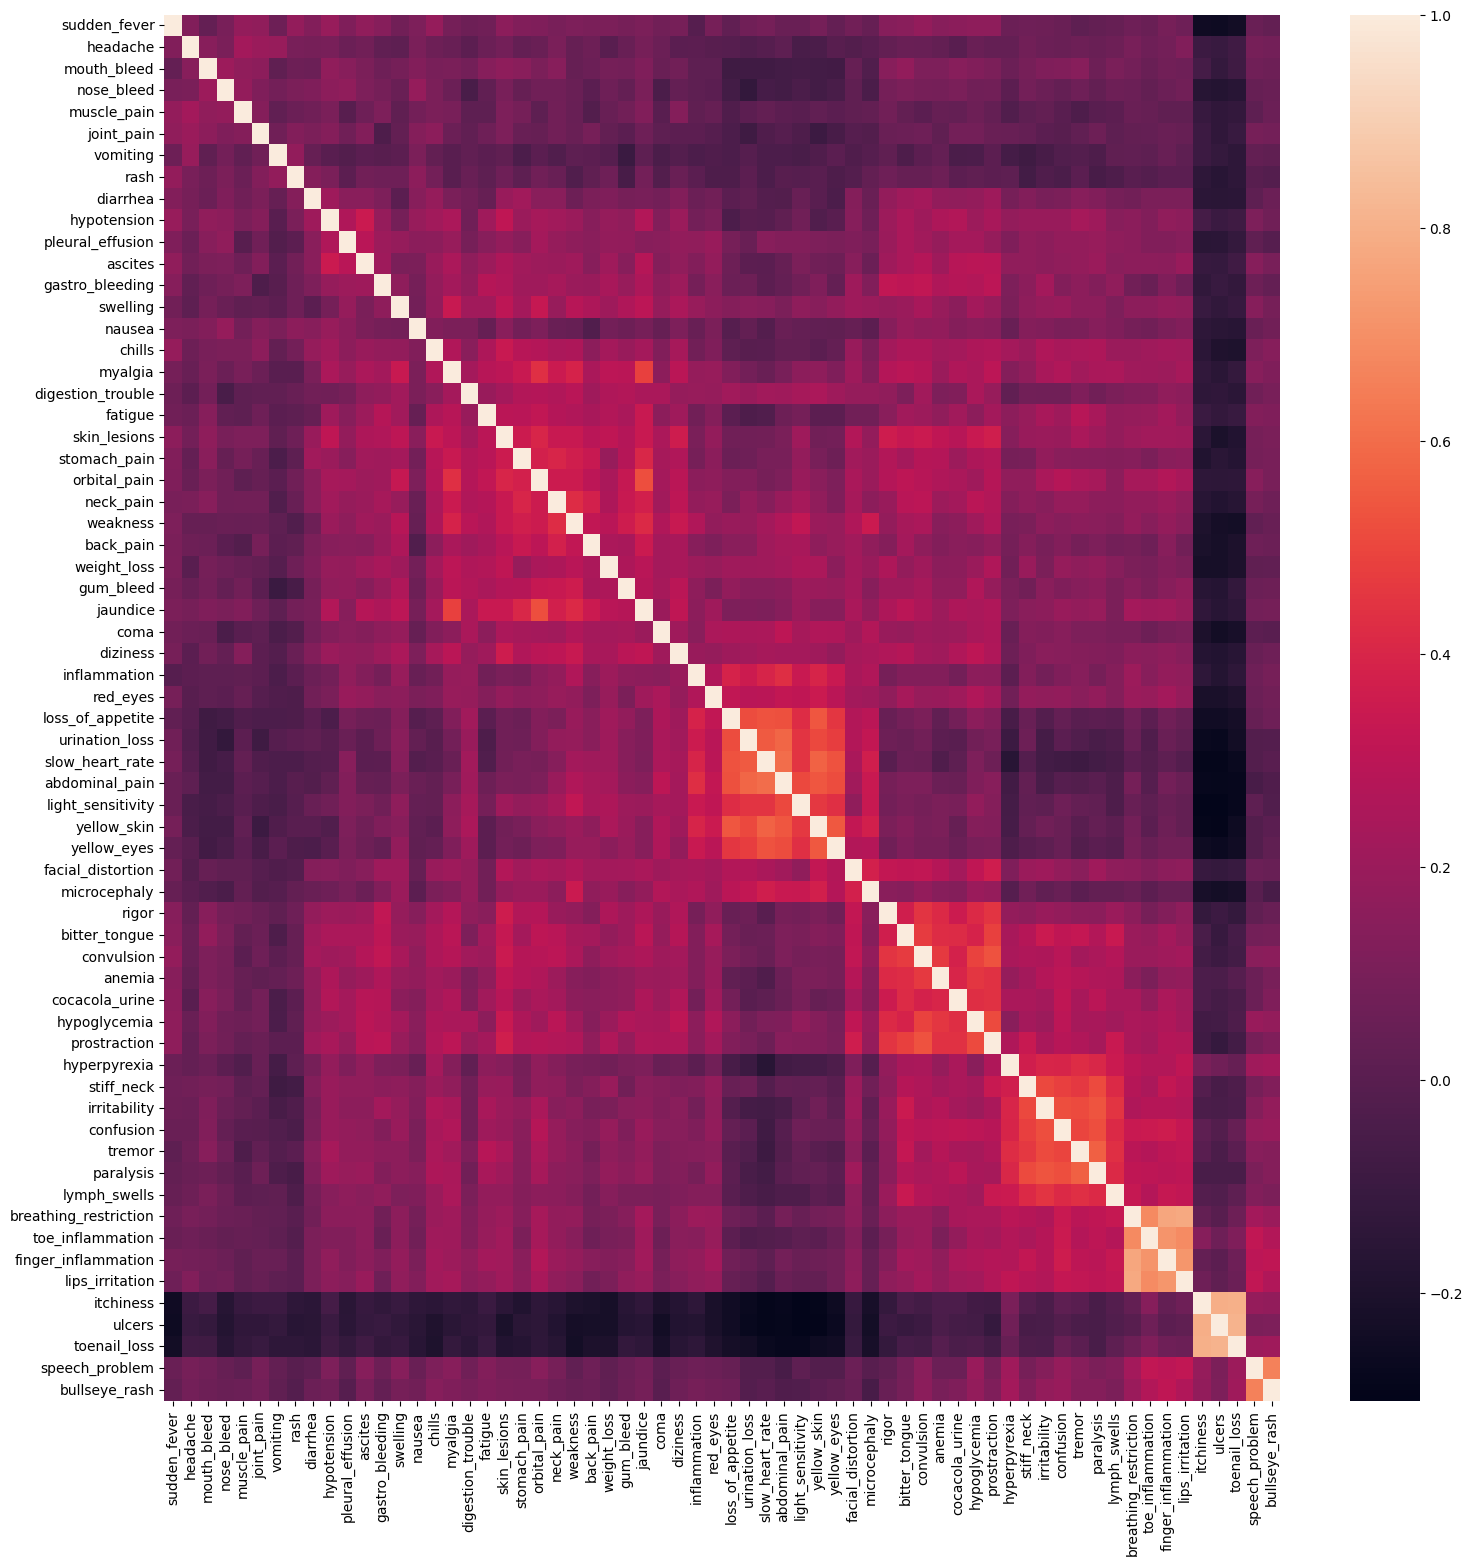

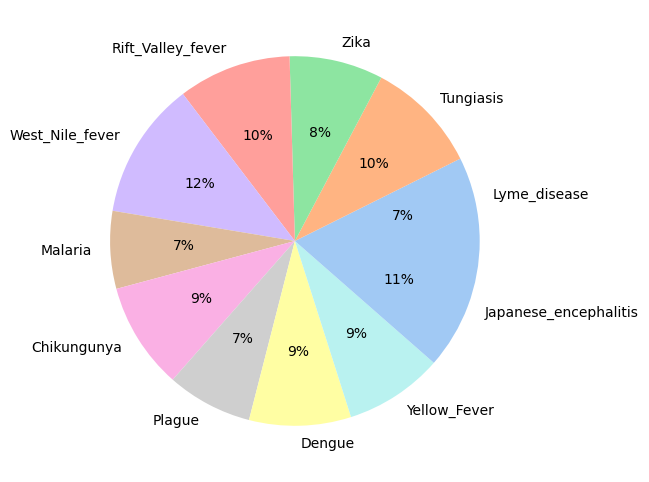

In [ ]:
# Frequency of each prognosis value
unique_prognosis_vals = train['prognosis'].unique()
prog_vals_freq = {}
for i in unique_prognosis_vals:
    prog_vals_freq[i]=0

for i in range(0, len(train['prognosis'])):
    prog_vals_freq[train['prognosis'][i]]+=1
    
display(prog_vals_freq)


# [START] ---- HEATMAP
plt.figure(figsize=(18, 18))
sns.heatmap(X.corr(numeric_only=False))
# [END] ---- HEATMAP


# [START] ---- BAR GRAPH (COUNT FREQUENCY OF EACH VALUE IN TARGET)



    
# plt.figure(figsize=(12, 6))
# plt.title('Frequency of Each Unique Prognosis Value')
# sns.barplot(x=unique_prognosis_vals, y=prog_vals_freq)
# [END] ---- BAR GRAPH (COUNT FREQUENCY OF EACH VALUE IN TARGET)
plt.figure(figsize=(12, 6))
frequencies=[]
for i in unique_prognosis_vals:
    frequencies.append(prog_vals_freq[i])
colors = sns.color_palette('pastel')[0:11]

plt.pie(frequencies, labels=unique_prognosis_vals, colors=colors, autopct='%.0f%%')

# [START] ---- PIE GRAPH

# [END] ---- PIE GRAPH


display(train['prognosis'].unique())

# sns.barplot(x=train['prognosis'].unique(), y=((train['prognosis']==train['prognosis'].unique()).sum()))

# RandomForestClassifier

In [ ]:
def study_rfc(X, y):
    def objective(trial):
        # For RandomForestClassifier
        n_estimators = trial.suggest_int('n_estimators', 10, 500)
        max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 100)
        max_depth = trial.suggest_int('max_depth', 1, 30)
        
        rf = RandomForestClassifier(n_estimators=n_estimators,
                        max_leaf_nodes=max_leaf_nodes,
                        max_depth=max_depth)


        # Cross Validation
        # score = cross_val_score(rf, X, y, n_jobs=4, cv=5 , scoring='accuracy', error_score='raise')
        # return score.mean()
        
        # Repeated Stratified KFold
        kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=69);
        scores = cross_val_score(rf, X, y, cv=kfold, n_jobs=4)
        return np.mean(scores)
        
        # scores = []
        
        # for train_idx, test_idx in kfold.split(X, y):
        #     display(train_idx)
        #     display(test_idx)
        #     display(X[X.columns][train_idx])
        #     X_train, X_test = X[X.columns][train_idx], X[X.columns][test_idx]
        #     y_train, y_test = y[y.columns][train_idx], y[y.columns][test_idx]
        #     rf.fit(X_train, y_train)
        #     y_pred = rf.predict(X_test)
        #     scores.append(balanced_accuracy_score(y_test, y_pred))
        
        # return np.mean(scores)
    
        

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=5)
    
    return study.best_params, study.best_value

best_params_rfc, best_value_rfc = study_rfc(X, y2)
print(f'best_params_rfc: {best_params_rfc}')
print(f'best_value_rfc: {best_value_rfc}')

[I 2023-04-27 11:48:56,881] A new study created in memory with name: no-name-e3b374d2-cee0-4457-aa21-ca9559d71c2c
[I 2023-04-27 11:49:06,952] Trial 0 finished with value: 0.3017236753856472 and parameters: {'n_estimators': 125, 'max_leaf_nodes': 63, 'max_depth': 3}. Best is trial 0 with value: 0.3017236753856472.
[I 2023-04-27 11:49:10,997] Trial 1 finished with value: 0.3125352112676057 and parameters: {'n_estimators': 107, 'max_leaf_nodes': 45, 'max_depth': 15}. Best is trial 1 with value: 0.3125352112676057.
[I 2023-04-27 11:49:25,320] Trial 2 finished with value: 0.31069081153588207 and parameters: {'n_estimators': 418, 'max_leaf_nodes': 46, 'max_depth': 7}. Best is trial 1 with value: 0.3125352112676057.
[I 2023-04-27 11:49:31,525] Trial 3 finished with value: 0.2960898725687458 and parameters: {'n_estimators': 204, 'max_leaf_nodes': 9, 'max_depth': 7}. Best is trial 1 with value: 0.3125352112676057.
[I 2023-04-27 11:49:34,731] Trial 4 finished with value: 0.30315224681421865 and 

best_params_rfc: {'n_estimators': 107, 'max_leaf_nodes': 45, 'max_depth': 15}
best_value_rfc: 0.3125352112676057


# XGBClassifier

In [ ]:
def study_xgbc(X, y):
    def objective(trial):
        # For XGBClassifier
        n_estimators = trial.suggest_int('n_estimators', 10, 250)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
        max_depth = trial.suggest_int('max_depth', 1, 30)
        
        xgb = XGBClassifier(n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        max_depth=max_depth)

        score = cross_val_score(xgb, X, y, n_jobs=4, cv=5, error_score='raise')
        
        return score.mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    
    return study.best_params, study.best_value

# best_params_xgbc, best_value_xgbc = study_xgbc(X, y2)
# print(f'best_params_xgbc: {best_params_xgbc}')
# print(f'best_value_xgbc: {best_value_xgbc}')

# KNeighborsClassifier

In [ ]:
def study_knc(X, y):
    def objective(trial):
        # For KNeighborsClassifier
        n_neighbors = trial.suggest_int('n_neighbors', 10, 100)
        leaf_size = trial.suggest_int('leaf_size', 1, 500)
        p = trial.suggest_int('p', 1, 5)
        
        kn = KNeighborsClassifier(n_neighbors=n_neighbors,
                        leaf_size=leaf_size,
                        p=p)

        score = cross_val_score(kn, X, y, n_jobs=4, cv=5, error_score='raise')
        
        return score.mean()

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)
    
    return study.best_params, study.best_value

# best_params_knc, best_value_knc = study_knc(X, y2)
# print(f'best_params_knc: {best_params_knc}')
# print(f'best_value_knc: {best_value_knc}')

# LGBMClassifier

In [ ]:
def study_lgbm(X, y):
    def objective(trial):
        # For LGBMClassifier
        num_leaves = trial.suggest_int('num_leaves', 10, 500)
        max_depth = trial.suggest_int('max_depth', -1, 50)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
        n_estimators = trial.suggest_int('n_estimators', 1, 1000)
        random_state = 69
        # consider class_weight
        
        
        lgbm = LGBMClassifier(
            num_leaves=num_leaves,
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            random_state=random_state
        )

        score = cross_val_score(lgbm, X, y, n_jobs=4, cv=5, error_score='raise')
        
        return score.mean()

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)
    
    return study.best_params, study.best_value

# best_params_lgbm, best_value_lgbm = study_lgbm(X, y2)
# print(f'best_params_lgbm: {best_params_lgbm}')
# print(f'best_value_lgbm: {best_value_lgbm}')

# Submission

In [ ]:
# Single prediction
# final_model = RandomForestClassifier(
#     n_estimators=best_params_rfc['n_estimators'],
#     max_leaf_nodes=best_params_rfc['max_leaf_nodes'],
#     max_depth=best_params_rfc['max_depth'],
#     n_jobs=4
# )

# final_model.fit(X, y2)

# predictions = final_model.predict(X_test)

# display(predictions)

# # predictions = predictions.to_numpy(predictions)

# # predictions=predictions.astype("object")
# # predictions = ordinal_encode(predictions, inverse=True)


# submission = pd.DataFrame({'id':test.id, 'prognosis':predictions})

# display(submission)

# submission.to_csv('submission3.csv', index=False)



# Multiple predictions
final_model = RandomForestClassifier(
    n_estimators=best_params_rfc['n_estimators'],
    max_leaf_nodes=best_params_rfc['max_leaf_nodes'],
    max_depth=best_params_rfc['max_depth'],
    n_jobs=4
)

final_model.fit(X, y2)

predictions = final_model.predict_proba(X_test)

display(predictions)

predictions = np.argsort(-predictions, axis=1)

# display(predictions)



original_shape = predictions.shape
predictions = predictions[:,:3]
predictions = predictions.reshape(-1, 1)
# predictions = ordinal_encode(predictions, inverse=True)
enc.inverse_transform(predictions)
predictions = predictions.reshape(original_shape)

# for i in range(0, len(predictions)):
#     predictions[i]=' '.join(predictions[i])

# test['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, predictions)

submission = pd.DataFrame({'id':test.id, 'prognosis':predictions})

submission.to_csv('submission3.csv', index=False)

array([[0.11539565, 0.11585744, 0.1202714 , ..., 0.09713999, 0.0761885 ,
        0.13624227],
       [0.16024122, 0.24954102, 0.06510116, ..., 0.09775293, 0.03464262,
        0.03440779],
       [0.02204559, 0.09839383, 0.17385062, ..., 0.15284017, 0.10612164,
        0.09083119],
       ...,
       [0.01960901, 0.06616441, 0.13778298, ..., 0.17288125, 0.05830066,
        0.08341312],
       [0.02447724, 0.13545591, 0.10001816, ..., 0.16228011, 0.0696328 ,
        0.12328914],
       [0.01045682, 0.03382508, 0.14206412, ..., 0.15937604, 0.12202243,
        0.18466222]])

ValueError: Shape of the passed X data is not correct. Expected 64 columns, got 1.